# Integration and Visualization
- YOUR NAME: Matúš Hába
- YOUR VUNetID: mha473

(If you do not provide your NAME and VUNetID we will not accept your submission.)

**To hand in: one zip file, containing...**
- this file, with completed tasks
- the ontology you made in the previous assignment
- an integrated ontology (`mapping.ttl`)

## Task 1 (20 Points):  Integrating ontologies in Protégé
Take the ontology you built for Module 4 (let’s call it ontology A), and find either a fellow student with a similar ontology or an ontology on the web on similar domain. That will be our ontology B. 

Create an empty ontology in Protégé (ontology C), and import both ontologies. 

Define at least 6 mappings as following:

-    1 mapping between a class from A and a class from B using rdfs:subClassOf 
-    1 mapping between a class from A and a class from B using owl:equivalentClass
-    1 mapping between a property from A and a property from B using rdfs:subPropertyOf
-    1 mapping between a property from A and a property from B using either owl:equivalentProperty, owl:disjointProperty, owl:inverseOf, or owl:propertyChainAxiom
-    1 mapping between an individual from A and an individual from B using owl:differentFrom
-    1 mapping between an individual from A and an individual from B using owl:sameAs 

The combined ontology should be **consistent**.

Save the ontology as Turtle, where the filename is ‘`mapping.ttl`’

**Submit all three ontologies together with this assignment, leaving preserved the original file names of the ontologies**

In [158]:
print(open('mapping.ttl').read())
# https://oaei.ontologymatching.org/tests/102/onto.html

@prefix : <http://mapping//> .
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix vin: <http://www.w3.org/TR/2003/PR-owl-guide-20031209/wine#> .
@prefix xml: <http://www.w3.org/XML/1998/namespace> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@base <http://mapping//> .

<http://mapping/> rdf:type owl:Ontology ;
                   owl:imports <http://example/wine/> ,
                               <http://www.w3.org/TR/2003/PR-owl-guide-20031209/wine> ;
                   <http://purl.org/dc/elements/1.1/creator> "MatÃºÅ¡ HÃ¡ba" .

#################################################################
#    Annotation properties
#################################################################

###  http://www.w3.org/2002/07/owl#equivalentClass
owl:equivalentClass rdf:type owl:AnnotationProperty .


#################################################################
#

## Task 2 (10 Points):  Explain your mapping

Please explain and motivate the mapping you made in the previous question in a few sentences in the text field below :

...

NOTE, the namespace wine: refers to my ontology, whereas the namespace vin: referes to https://www.w3.org/TR/2003/PR-owl-guide-20031215/wine#

Firstly I matched the classes wine:Wine and vin:Wine, as they are equivalent not only by name, but also by meaning.
Secondly I declared vin:WineTaste owl:subClassOf win:WineDescriptor, because taste can be used to describe wine.
Thirdly I noticed that property vin:hasMaker and wine:producedBy is the same, so I declared it to be an equivalent property.
I also noticed that the property wine:producedIn was a sub-property of vin:locatedIn, so I declared it as such. 
While looking at individuals I noticed that wine:Red was the same color as vin:Red, so I declared this equality using owl:sameAs.
I also declared the region wine:Champagne to be a different one from vin:BordeauxRegion, which is also in France, but in a different part of France, using owl:differentFrom.

## Task 3 (20 points). From SPARQL to DataFrame

For the next few tasks we are going to store the results from our queries in a [Pandas DataFrame](https://pandas.pydata.org), making it easier to perform further data processing on the results. To accomplish this, write a procedure to execute the query and to convert the results into a dataframe. 

To help you on your way, we have already written the main procedure `table_from_query/2` and the helper function `cast/1` which converts the raw values to the appropriate Python objects. Your task is to write the two missing procedures: `execute_query/2` and `create_dataframe/1`. *HINT: revisit assignment 3 if you are unsure where to start*.

Please run the next two cells to import the necessary dependencies and to activate the helper procedures.

In [159]:
from SPARQLWrapper import SPARQLWrapper, JSON
import pandas as pd
from rdflib import URIRef

In [160]:
def cast(value):
    """ Cast the value from a SPARQL result to an appropriate Python object.
        The expected input is a dictionary with at least the keys 'type' and 'value'.
    """
    v = value['value']
    if value['type'] in ['literal', 'typed-literal'] and 'datatype' in value.keys():
        dtype = URIRef(value['datatype'])
        if any(d in dtype for d in ('integer', 'long', 'int', 'short', 'byte')):
            return int(v)
        if any(d in dtype for d in ('decimal', 'float', 'double')):
            return float(v)

    # fallback to string
    return str(v)


In [161]:
def execute_query(endpoint, query):
    sparql = SPARQLWrapper(endpoint)
    sparql.setQuery(query)
    sparql.setReturnFormat("json")
    return sparql.query().convert()
    # your code here

def create_dataframe(data):
    return pd.DataFrame([{k: cast(v) for k, v in d.items()} for d in data["results"]["bindings"]])
    
    # your code here

In [162]:

def table_from_query(endpoint, query):
    """ Execute a query on an endpoint and return the results as a dataframe.
    """
    query_results = execute_query(endpoint, query)
    dataframe = create_dataframe(query_results)

    return dataframe

To test your code, we ask you to create a dataframe about teachers and their course load. We will use the data in `vuDataset.ttl`, which must be imported in GraphDB as a new repository called `repo-vu`. Use the following endpoint and query for this purpose.


In [163]:
sparql_endpoint = "http://localhost:7200/repositories/repo-vu"
sparql_query = """
PREFIX vu: <http://example.org/vu/>

SELECT ?teacher (COUNT(*) as ?courses) {
    ?teacher vu:teaches ?o .
} GROUP BY ?teacher
"""

courseload = table_from_query(sparql_endpoint, sparql_query)
print(courseload)

                        teacher  courses
0  http://example.org/vu/stefan        5
1   http://example.org/vu/frank        3
2     http://example.org/vu/joe        1


## Task 4 (20 points) - Data visualization

Visualizing (parts of) the data can help us gain a better understanding of what we are dealing with. Now that the data is stored as a dataframe, we can use a library like `matplotlib` to create a variety of helpful plots. To illustrate this, run the following cells to install and import the library, and to generate a pie plot from our dataframe about course loads.

In [164]:
%pip install pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [165]:
import matplotlib

<Axes: ylabel='courses'>

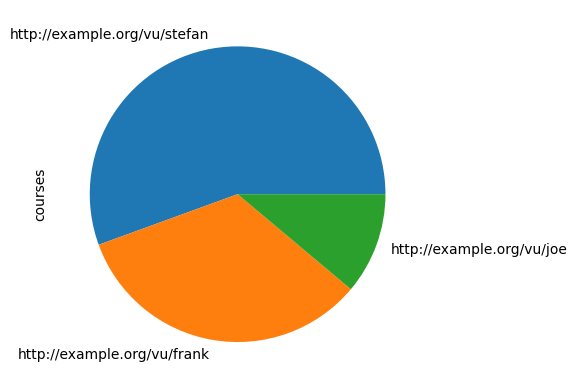

In [166]:
# Pandas visualization
courseload1 = courseload.copy()
courseload1.set_index('teacher', inplace=True)
courseload1['courses'].plot.pie()

## Task 4a (10 points): Make a horizontal bar chart (with suitable labels and title) from the `courseload` dataframe

There are many different kinds of plots that we can make. Please look at [the Pandas wiki](https://pandas.pydata.org/docs/user_guide/visualization.html) to get an idea on what is possible.

<Axes: xlabel='teacher'>

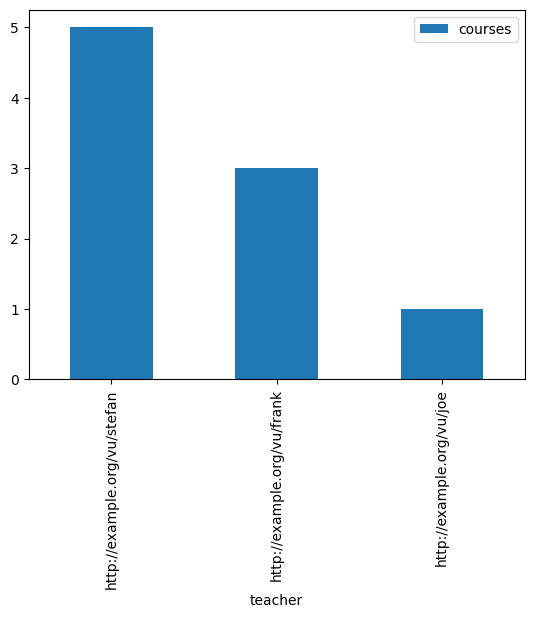

In [167]:
# your code here
courseload2 = courseload.copy()
courseload2.plot.bar(x = "teacher", y="courses")

## Task 4b (10 points): Write a new SPARQL query for DBpedia and create an interesting chart from it

<Axes: xlabel='color'>

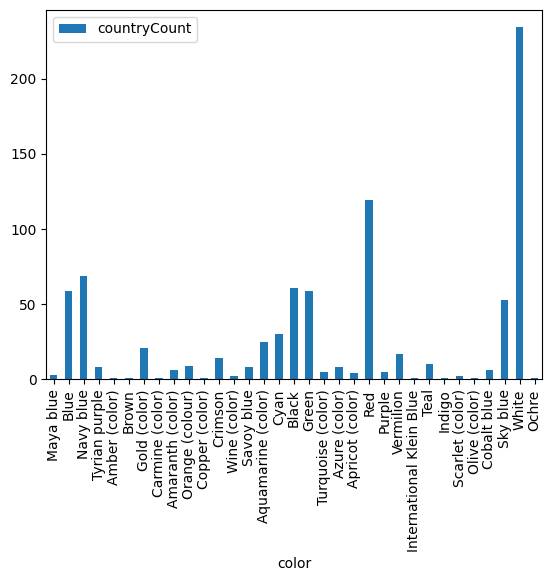

In [168]:
# your code here


endpoint = "http://dbpedia.org/sparql"
query = """
    PREFIX db: <http://dbpedia.org/>
    PREFIX dbp: <http://dbpedia.org/property/>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    PREFIX dct: <http://purl.org/dc/terms/>
    PREFIX dbc: <http://dbpedia.org/resource/Category:>
    PREFIX dbo: <http://dbpedia.org/ontology/>
    PREFIX dbr: <http://dbpedia.org/resource/>
    PREFIX yago: <http://dbpedia.org/class/yago/>
           

    SELECT ?color (COUNT(?country) AS ?countryCount) (GROUP_CONCAT(DISTINCT ?countryLabel; separator=", ") AS ?countries)
    WHERE{

        ?country dct:subject dbc:Member_states_of_the_United_Nations.
        ?nationalFlag dbo:wikiPageWikiLink ?country;
           	 a yago:NationalFlag106882009.
        ?nationalFlag dbo:wikiPageWikiLink ?flagLink.
        ?flagLink a dbo:Colour.
  		?flagLink dbo:colourHexCode ?hex.
  		?flagLink rdfs:label ?color
  		FILTER (lang(?color) = "en")
    }   
"""

table_from_query(endpoint, query).plot.bar(x='color', y="countryCount")

## Task 5 (10 points). Conditional styling

Below is a query to find all EU countries and their surface area in $m^2$. Below that is some code that adds some colour to the resulting table.


We ask you to update the query and code below to add a new column that shows the percentage of the country's area that is water.
The background color of this column must depend on this percentage: it should be greener if more of the country is land, and bluer if more of the country is water.

In [169]:
endpoint = "http://dbpedia.org/sparql"
query = """
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX yago: <http://dbpedia.org/class/yago/>

SELECT DISTINCT ?name ?area_100k_km2 ?giniCoefficient ?waterPercentage
WHERE { 
    ?country 
        a yago:WikicatMemberStatesOfTheEuropeanUnion ;
        dbo:area ?area ; # area is stated in m^2
        dbo:giniCoefficient ?giniCoefficient ;
        rdfs:label ?name. 
    ?country dbo:percentageOfAreaWater ?waterPercentage.
    
    BIND (ROUND(?area/100000000000) AS ?area_100k_km2)
    FILTER(LANG(?name) = 'en')
}
ORDER BY DESC(?area_100k_km2)
LIMIT 50"""

dbpedia_countries = table_from_query(endpoint, query)

In [170]:
# Styling: https://pandas.pydata.org/docs/user_guide/style.html
# Using CSS Hue-Saturation-Level colors: https://www.w3schools.com/colors/colors_hsl.asp


def gini_color(gini):
    return f"background: hsl({100 - gini}, 100%, 50%)"


def water_color(waterPercentage):
    return f"background: rgb(0, {255 - int(waterPercentage * 25.5)}, {int(waterPercentage * 25.5)})"


dbpedia_countries.style.map(gini_color, subset=(slice(None), "giniCoefficient")).map(
    water_color, subset=(slice(None), "waterPercentage")
)

,name,area_100k_km2,giniCoefficient,waterPercentage
0,France,6.000000,29.299999,0.860000
1,Sweden,5.000000,26.799999,8.370000
2,Spain,5.000000,33.000000,0.890000
3,Germany,4.000000,30.500000,1.270000
4,Finland,3.000000,25.700001,9.710000
5,Italy,3.000000,32.500000,1.240000
6,Poland,3.000000,27.200001,1.480000
7,Romania,2.000000,34.299999,3.000000
8,United Kingdom,2.000000,36.599998,1.510000
9,Hungary,1.000000,28.299999,3.700000


# Map Visualizations

Below is a query to find all EU capitals, together with their coordinates. The results are drawn on a map using the library `folium`. 

First run the following cells to install and import the library.

In [171]:
%pip install folium

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [172]:
import folium

# Task 6 (20 points) - Population counts

We ask you to update the query and code below to make the markers (circles) scale with the population of the capital (but keep it readable!).

In [173]:
endpoint = "http://query.wikidata.org/sparql"
query = """
PREFIX dbp: <http://dbpedia.org/property/>
SELECT ?capitalLabel ?coords ?population
WHERE {
    ?country
        wdt:P463 wd:Q458 ; # member of: European Union
        wdt:P36 ?capital . # capital: ?capital
        
    ?capital 
        wdt:P625 ?coords . # coordinate location: ?coords

    ?capital wdt:P1082 ?population. 
    
    # Using Wikidata-only label service
    SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}"""

capitals = table_from_query(endpoint, query)

In [174]:
# Extract latitude and longitude from coordinates in Well-Known Text (WKT) format
capitals_coords = capitals.join(capitals.coords.str.extract('Point\\((?P<lon>\\S+) (?P<lat>\\S+)\\)').astype(float))

middle = [capitals_coords['lat'].mean(), capitals_coords['lon'].mean()]
m = folium.Map(location=middle, zoom_start=4)
for _, row in capitals_coords.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=row["population"] ** 0.25,
        popup= row['capitalLabel'],
        color="#3186cc",
        fill=True,
        fill_color="#3186cc",
    ).add_to(m)

m